In [1]:
# Install the main library YFinance
!pip install yfinance

     -------------------------------------- 117.9/117.9 kB 1.1 MB/s eta 0:00:00
     ---------------------------------------- 64.9/64.9 kB 3.6 MB/s eta 0:00:00
  Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)
     ---------------------------------------- 3.0/3.0 MB 12.1 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     ---------------------------------------- 1.4/1.4 MB 22.3 MB/s eta 0:00:00
     ------------------------------------- 176.8/176.8 kB 10.4 MB/s eta 0:00:00
     -------------------------------------- 159.6/159.6 kB 9.3 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.18.1-py3-none-any.whl size=139097 sha256=b274e9af4431090d4ac17d14aa04044b53eaa2c9090ee4a5

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.20 requires clyent==1.2.1, but you have clyent 1.2.2 which is incompatible.
conda-repo-cli 1.0.20 requires nbformat==5.4.0, but you have nbformat 5.5.0 which is incompatible.
conda-repo-cli 1.0.20 requires requests==2.28.1, but you have requests 2.32.3 which is incompatible.


In [5]:
import numpy as np
import pandas as pd

import yfinance as yf
import pandas_datareader as pdr

import plotly.graph_objs as go
import plotly.express as px

import time
from datetime import date

## 1) Understanding Data-Driven decisions data pulls

In [6]:
end = date.today()
print(f'Year = {end.year}; month = {end.month}; day = {end.day}')

start = date(year=end.year-70, month=end.month, day=end.day)
print(f'Period for indexes: {start} to {end}')

Year = 2025; month = 5; day = 31
Period for indexes: 1955-05-31 to 2025-05-31


### 1.1) GDP

In [7]:
# Real Potential Gross Domestic Product (GDPPOT), Billions of Chained 2012 Dollars, QUATERLY
# https://fred.stlouisfed.org/series/GDPPOT
gdppot = pdr.DataReader("GDPPOT", "fred", start=start)

In [9]:
gdppot['gdppot_us_yoy'] = gdppot.GDPPOT / gdppot.GDPPOT.shift(4) - 1
gdppot['gdppot_us_qoq'] = gdppot.GDPPOT / gdppot.GDPPOT.shift(1) - 1
gdppot.tail(15)

,GDPPOT,gdppot_us_yoy,gdppot_us_qoq
DATE,,,
2021-10-01,21606.08076,0.020390,0.005260
2022-01-01,21722.02480,0.020882,0.005366
2022-04-01,21840.56636,0.021403,0.005457
2022-07-01,21961.53508,0.021799,0.005539
2022-10-01,22084.92536,0.022162,0.005618
2023-01-01,22208.24254,0.022384,0.005584
2023-04-01,22333.11239,0.022552,0.005623
2023-07-01,22459.74068,0.022685,0.005670
2023-10-01,22588.18459,0.022787,0.005719


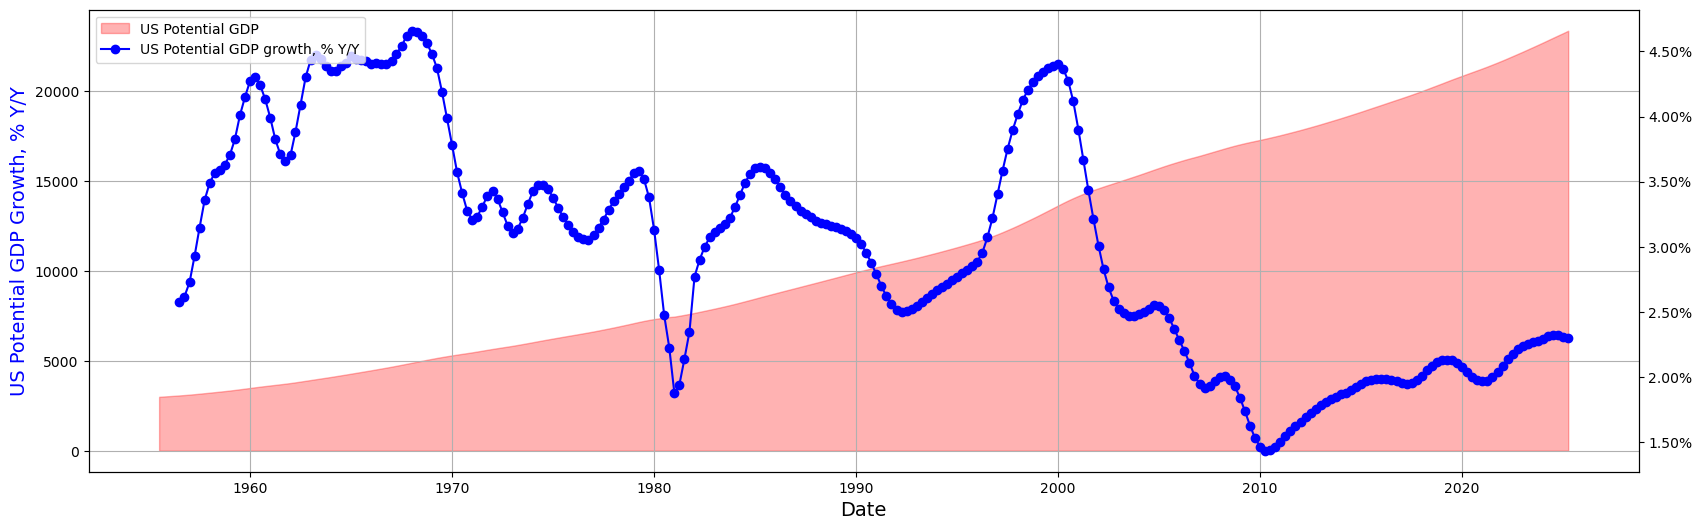

In [10]:
# Visual GDPPOT

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

fig, ax = plt.subplots(figsize=(20,6))
plt.grid(True)

# Plotting area under US potential GDP curve
ax.fill_between(gdppot.index, gdppot.GDPPOT, color="red", alpha=0.3, label="US Potential GDP")

# Creating a secondary y-axis for GDP growth percentage
ax2 = ax.twinx()
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax2.plot(gdppot.gdppot_us_yoy, color="blue", marker="o", label="US Potential GDP growth, % Y/Y")

# Setting labels and title
ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("US Potential GDP, $b", color="red", fontsize=14)
ax.set_ylabel("US Potential GDP Growth, % Y/Y", color="blue", fontsize=14)

# Adding Legend
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.show()